<a id='TOP'> </a>
___
<!-- for i in range(1,14):
    print(f'|[--__{i}__--](#{i})|') -->

# Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the _Zillow_ data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an 'end-to-end project' in which you use some of their 'Kaggle' data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

<a id='1'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

||[__--COUNTY CODES--__](#needs)||

In [1]:
from wrangle import wrangle_zillow, scale_zillow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import pearsonr, spearmanr

In [2]:
from sklearn.model_selection import train_test_split

<a id='2'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

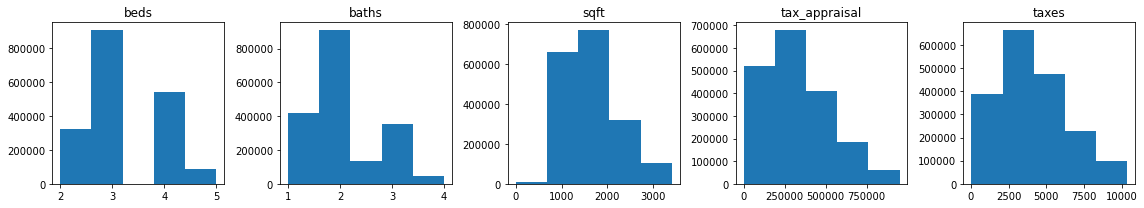

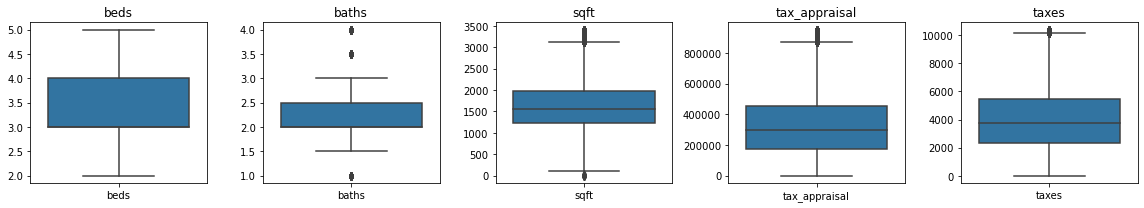

In [3]:
train, validate, test = wrangle_zillow()

In [4]:
train = train[sorted(train.columns)]

In [5]:
validate = validate[sorted(validate.columns)]

In [6]:
test = test[sorted(test.columns)]

In [7]:
train

,baths,beds,fips,sqft,tax_appraisal,taxes,yr_built
10057,2.0,4.0,6059.0,1561.0,248240.0,2504.40,1973
2004970,2.0,3.0,6037.0,1770.0,88390.0,1671.93,1960
306031,1.0,2.0,6037.0,1452.0,81169.0,1310.88,1946
1038595,1.0,3.0,6037.0,1000.0,119174.0,1900.28,1950
270959,2.0,3.0,6037.0,1974.0,432268.0,5315.27,1988
...,...,...,...,...,...,...,...
991122,1.0,3.0,6111.0,1199.0,280857.0,3282.40,1951
1707759,2.0,4.0,6037.0,1859.0,95008.0,1463.61,1961
1770246,3.0,3.0,6037.0,2132.0,158470.0,2037.38,1980
1500741,1.0,2.0,6037.0,780.0,477167.0,6509.69,1955


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   baths          1038959 non-null  float64
 1   beds           1038959 non-null  float64
 2   fips           1038959 non-null  object 
 3   sqft           1038959 non-null  float64
 4   tax_appraisal  1038959 non-null  float64
 5   taxes          1038959 non-null  float64
 6   yr_built       1038959 non-null  object 
dtypes: float64(5), object(2)
memory usage: 63.4+ MB


<a id='3'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 3. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

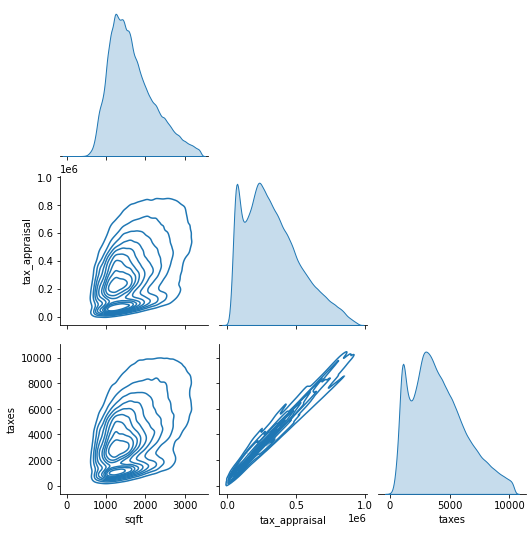

In [17]:
# try not to run this cell if you can avoid it...
%%timeit
# Next time this runs, fill in the time:______
sns.pairplot(data=train[['sqft', 'tax_appraisal', 'taxes']],
#              x_vars=,
             corner=True,
             kind='kde'
            )
plt.show()

In [53]:
# cols = train.columns.tolist()
trainx = train.columns.tolist()
trainy = train.columns.tolist()
for x in trainx:
    trainx.remove(x)
#     print(train_ys)
    for y in trainy:
        
        print(x,y)
        trainy.remove(y)
#         sns.lmplot(data = train,
#                      x= x,
#                      y= y,
#                      line_kws= {'color':'red'}
#                     )
#         plt.show()

baths baths
baths fips
baths tax_appraisal
baths yr_built
fips beds
fips taxes
tax_appraisal sqft


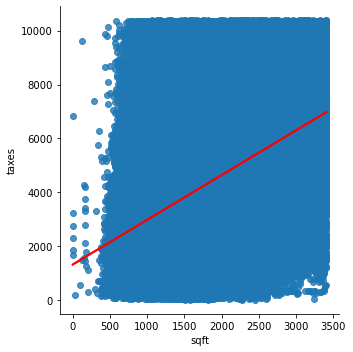

In [9]:
sns.lmplot(data=train,
              x= 'sqft',
              y= 'taxes',
              line_kws= {'color': 'red'}
)
plt.show()

In [33]:
# %%timeit
# sns.jointplot(data=train,
#               x= 'sqft',
#               y= 'tax_appraisal',
#               kind= 'scatter',
#               hue= 'fips'
# )
# plt.show()

In [10]:
corr = train.corr(method='spearman')

In [11]:
mask_corr = np.triu(corr)


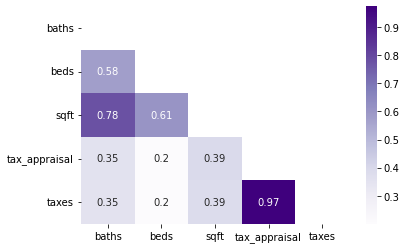

In [12]:
sns.heatmap(corr,
            cmap='Purples',
            annot=True,
            mask = mask_corr,
           )
plt.show()

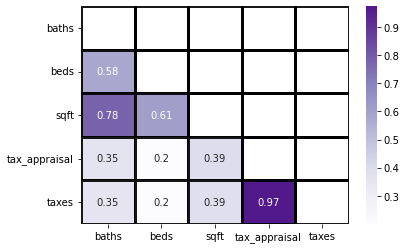

In [13]:
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}
sns.heatmap(corr,
            cmap='Purples',
            annot=True,
            mask = mask_corr,
            **kwargs
           )
plt.show()

<a id='4'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

In [43]:
def plot_categorical_and_continuous_vars(df, contin_vars, cat_vars):
    
    '''
    Accepts:
    -------------
    df : a Dataframe,
    
    contin_vars : continuous variable column list from df,
    
    cat_vars : categorical variable list from df
    -------------
    
    Outputs 3 different plots for visualizing categorical vs. continuous variables
    '''
    
#     cat = df[cat_vars]
#     cont = df[contin_vars]
    
#     Length of categorical variable columns
    num_cats = len(cat_vars)
    
#     Length of continuous variable columns
    num_conts = len(contin_vars)
    
#     Number of rows for the total subplot size
    rows = num_cats * num_conts
    print(rows, type(rows))
    num_plot = 1
    
    fig, axs = plt.subplots(rows, 3)
    
    for i, j in enumerate(cat_vars):
        for a, b in enumerate(contin_vars):
            print(j, b)
            if b != 'tax_appraisal':
                hue = 'binned_values'
            else: hue = None
            print(hue)
                        
            plt.subplot(rows, 3, num_plot)
            
            sns.catplot(x= j,
                        y= b,
                        data= df,
                        hue= hue,
                       )
            plt.show()
            
            num_plot += 1
            
            plt.subplot(rows, 3, num_plot)
            
            px.sunburst(data_frame= df,
                        path = [j, b],
                        color= hue,
                       )
            plt.show()
            
            num_plot += 1
            
            plt.subplot(rows, 3, num_plot)
            
            sns.swarmplot(size= 1,
                          linewidth= 1,
                          data = df,
                          x= j,
                          y= b,
                          dodge= True,
                         )
            plt.show()
            
            plot += 1
    
    
    

In [53]:
def plot_categorical_and_continuous_vars(df, contin_vars, cat_vars):
    
    '''
    Accepts:
    -------------
    df : a Dataframe,
    
    contin_vars : continuous variable column list from df,
    
    cat_vars : categorical variable list from df
    -------------
    
    Outputs 3 different plots for visualizing categorical vs. continuous variables
    '''
    
#     cat = df[cat_vars]
#     cont = df[contin_vars]
    
#     Length of categorical variable columns
    num_cats = len(cat_vars)
    
#     Length of continuous variable columns
    num_conts = len(contin_vars)
    
#     Number of rows for the total subplot size
    rows = num_cats * num_conts
    print(rows, type(rows))
    
    row_plot = 0
    col_plot = 0
    hue = 'binned_values'
    
    fig, axs = plt.subplots(rows, 3)
    
    for i, j in enumerate(cat_vars):
        for a, b in enumerate(contin_vars):
            print(j, b)
#             if b != 'tax_appraisal':
#                 hue = 'binned_values'
#             else: hue = None
            print(hue)
                        
                
            sns.stripplot(x= j,
                        y= b,
                        data= df,
                        hue= hue,
                        ax= [row_plot, col_plot]
                       )
            plt.show()
            
            col_plot += 1
            
            axs[row_plot, col_plot].px.sunburst(data_frame= df,
                        path = [j, b],
                        color= hue,
                                                
                       )
            plt.show()
            
            col_plot += 1
            
            sns.swarmplot(size= 1,
                          linewidth= 1,
                          data = df,
                          x= j,
                          y= b,
                          dodge= True,
                          ax= axs[row_plot, col_plot]
                         )
            plt.show()
            
            col_plot = 0
            row_plot += 1
    
    
    

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

In [55]:
train.columns.to_list()

['baths', 'beds', 'fips', 'sqft', 'tax_appraisal', 'taxes', 'yr_built']

In [15]:
contin_vars = ['baths', 'beds', 'sqft', 'tax_appraisal', 'taxes']

cat_vars = ['fips', 'yr_built']

Los Angeles County, 06037 FIPS Code, California

Orange County, 06059 FIPS Code, California

Ventura County, 06111 FIPS Code, California

<a id='needs'></a>
___
# NEEDS MUST ↴

In [28]:
train.fips = train.fips.map({6037.0: 'Los Angeles County',
                6059.0: 'Orange County',
                6111.0: 'Ventura County'
               })

In [29]:
train.fips.value_counts()

Los Angeles County    695131
Orange County         262366
Ventura County         81462
Name: fips, dtype: int64

In [30]:
train_small.fips.value_counts()

6037.0    2834
6059.0     996
6111.0     325
Name: fips, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   baths          1038959 non-null  float64
 1   beds           1038959 non-null  float64
 2   fips           1038959 non-null  object 
 3   sqft           1038959 non-null  float64
 4   tax_appraisal  1038959 non-null  float64
 5   taxes          1038959 non-null  float64
 6   yr_built       1038959 non-null  object 
dtypes: float64(5), object(2)
memory usage: 63.4+ MB


<Figure size 1440x1440 with 0 Axes>

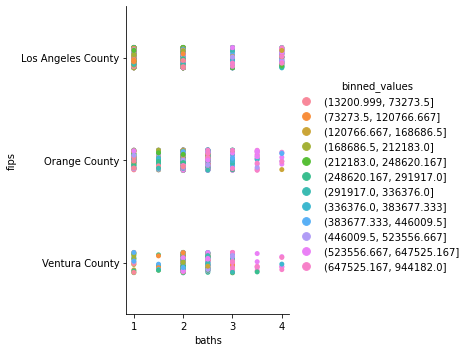

In [40]:
plt.figure(figsize=(20,20))
sns.catplot(data= train_small,
            y= 'fips',
            x= 'baths',
            hue= 'binned_values',
                       )
plt.show()

In [19]:
for i, j in enumerate(contin_vars):
    print(type(j))
    print(i,j)
    for a, b in enumerate(cat_vars):
        print(i, j, a+1, b)
        

<class 'str'>
0 baths
0 baths 1 fips
0 baths 2 yr_built
<class 'str'>
1 beds
1 beds 1 fips
1 beds 2 yr_built
<class 'str'>
2 sqft
2 sqft 1 fips
2 sqft 2 yr_built
<class 'str'>
3 tax_appraisal
3 tax_appraisal 1 fips
3 tax_appraisal 2 yr_built
<class 'str'>
4 taxes
4 taxes 1 fips
4 taxes 2 yr_built


In [84]:
type(train)

pandas.core.frame.DataFrame

In [31]:
# train_small = pd.DataFrame()
train_small, train_rest = train_test_split(train, train_size=1/250, random_state=123)

In [32]:
train_small

,baths,beds,fips,sqft,tax_appraisal,taxes,yr_built
976205,1.0,2.0,Los Angeles County,845.0,150377.0,2119.42,1950
83611,3.0,4.0,Orange County,1581.0,83160.0,1343.74,1954
1595114,1.0,2.0,Los Angeles County,1246.0,186638.0,2651.82,1956
1456667,2.0,2.0,Los Angeles County,985.0,820000.0,9823.30,1947
1542158,2.0,3.0,Los Angeles County,2015.0,228529.0,3906.70,1990
...,...,...,...,...,...,...,...
627262,1.0,3.0,Los Angeles County,1077.0,465000.0,5849.40,1952
548658,3.0,4.0,Orange County,3022.0,709289.0,8543.28,2002
1067944,3.0,5.0,Los Angeles County,2828.0,695445.0,8624.02,1973
53976,3.0,4.0,Ventura County,1854.0,473232.0,5053.94,1968


In [36]:
train_small['binned_values'] = pd.qcut(train_small.tax_appraisal, 12)

In [56]:
def plot_cat_and_num_vars(train, num_vars, cat_vars):
    for cat in cat_vars:
        plt.figure(figsize=(12,8))
        plt.title(f'Tax value and {cat}')
        sns.boxplot(data=train, y='tax_appraisal', x=cat)
        plt.show()
    
    for num in num_vars:
        sns.lmplot(data=train, y='tax_appraisal', x=num, height=8, aspect=12/8, hue='binned_values',line_kws={'color':'red'})
        plt.show()

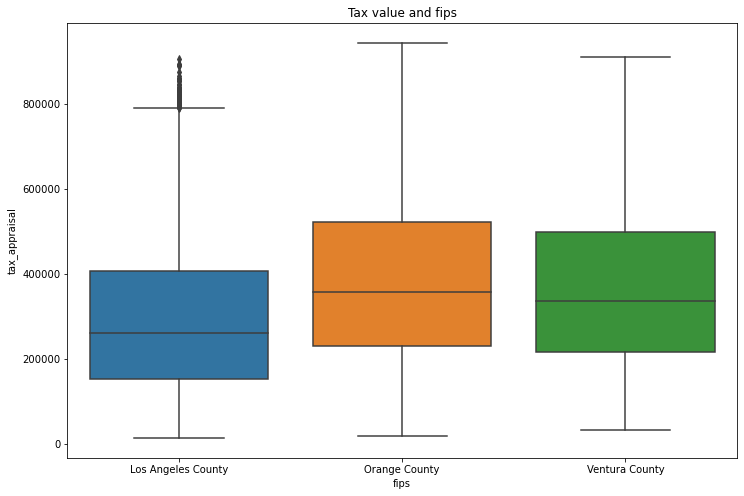

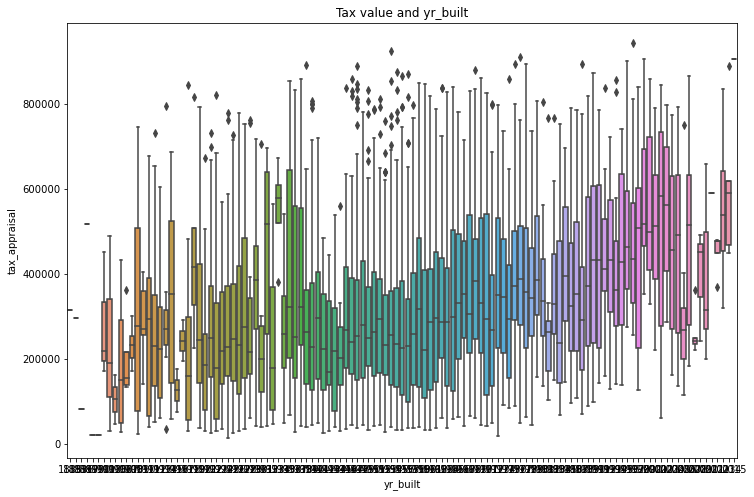

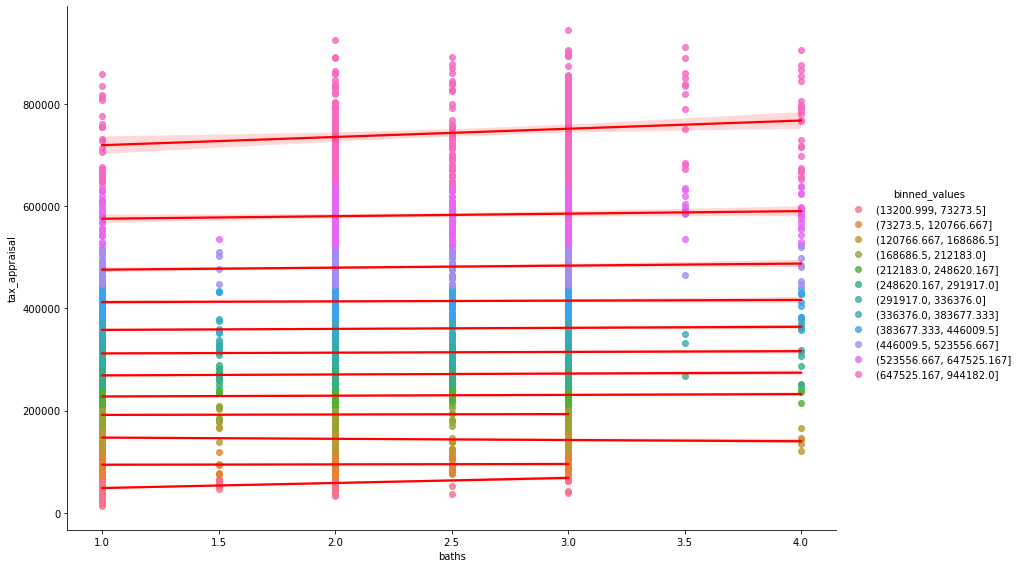

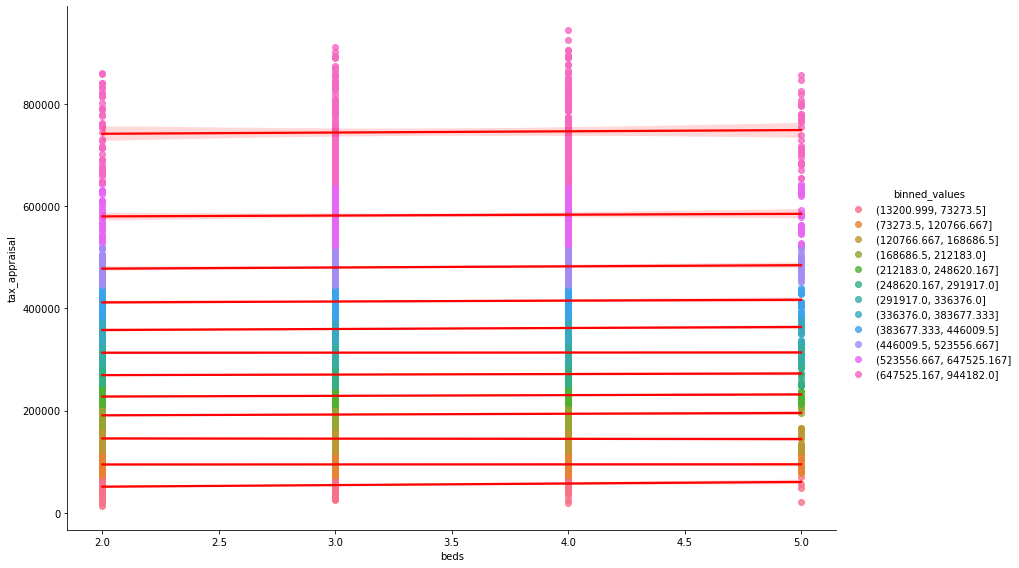

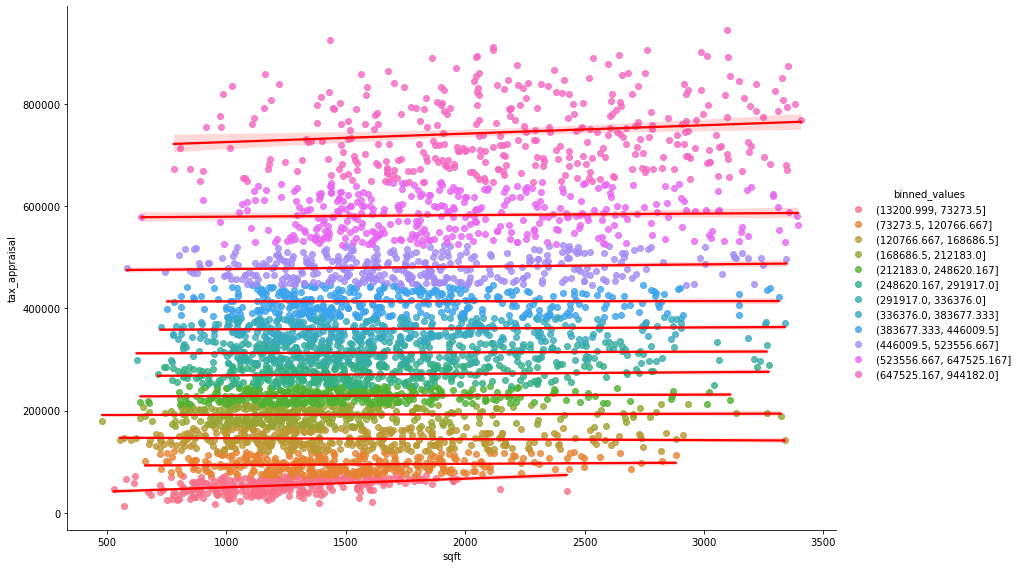

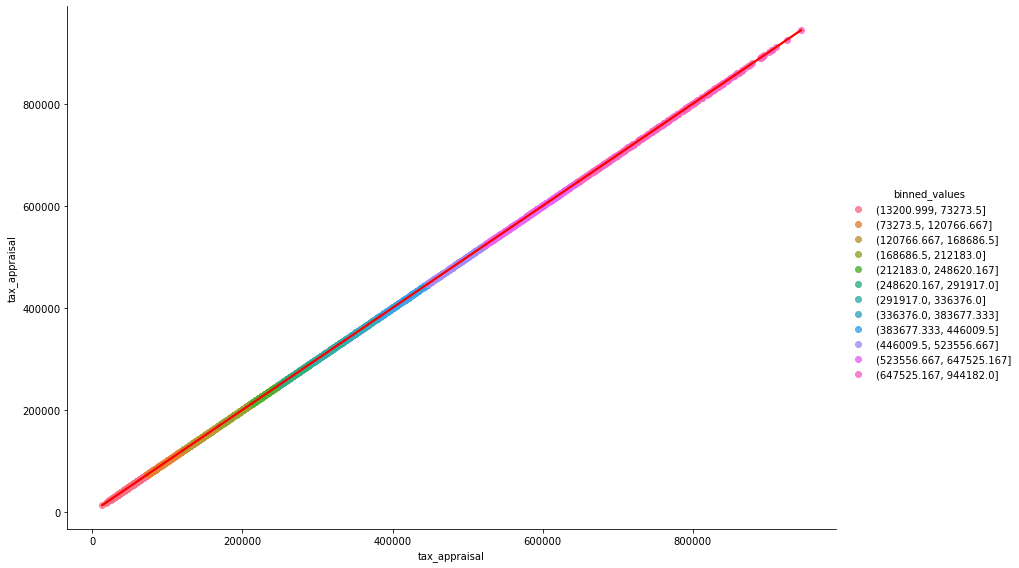

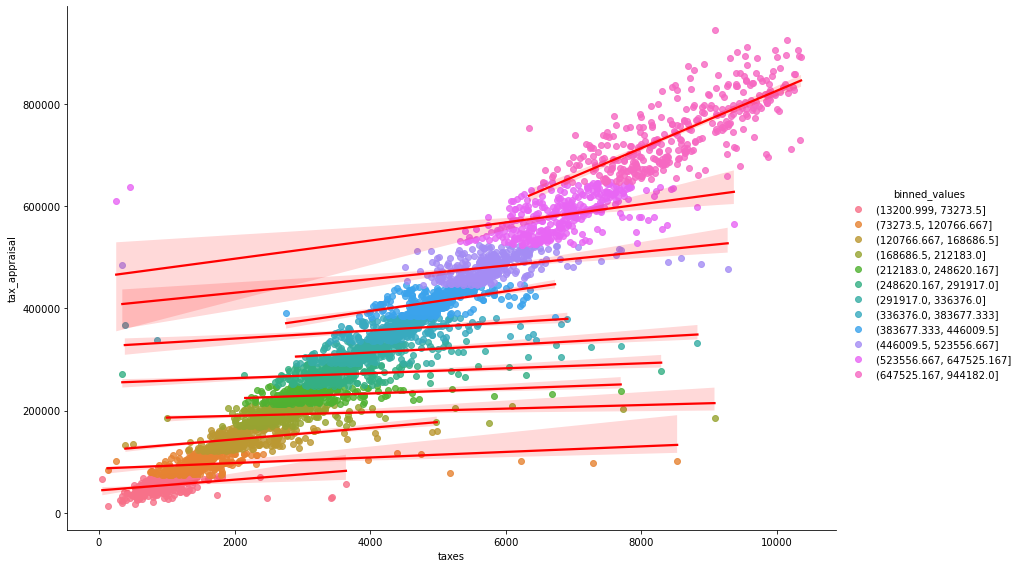

In [57]:
plot_cat_and_num_vars(train_small, contin_vars, cat_vars)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   baths          1038959 non-null  float64
 1   beds           1038959 non-null  float64
 2   fips           1038959 non-null  object 
 3   sqft           1038959 non-null  float64
 4   tax_appraisal  1038959 non-null  float64
 5   taxes          1038959 non-null  float64
 6   yr_built       1038959 non-null  object 
dtypes: float64(5), object(2)
memory usage: 63.4+ MB


<a id='5'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='6'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 6. Use the functions you created above to explore your Zillow train dataset in your `explore.ipynb` notebook.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='7'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 7. Come up with some initial hypotheses based on your goal of predicting property value.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='8'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 8. Visualize all combinations of variables in some way.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='9'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 9. Run the appropriate statistical tests where needed.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='10'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 10. What independent variables are correlated with the dependent variable, home value?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='11'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='12'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='13'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 13. Explore your dataset with any other visualizations you think will be helpful.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='BONUS'> </a>
<div class="alert alert-block alert-info">
</div>

***
# Bonus Exercise
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|


1. In a seperate notebook called `explore_mall`, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.

***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__10__--](#10)||[--__11__--](#11)||[--__12__--](#12)||[--__13__--](#13)||[--__BONUS__--](#BONUS)|

<a id='END'></a>
# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>